### Importaci√≥n de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

# 0. Objetivo del Proyecto: Desaf√≠o Alura Store

## Descripci√≥n general

Este proyecto forma parte del programa de especializaci√≥n en Data Science de Alura - Oracle Next Education (ONE). El desaf√≠o consiste en ayudar al **Se√±or Juan**, propietario de una cadena de tiendas llamada **Alura Store**, a tomar una decisi√≥n estrat√©gica: **vender una de sus cuatro tiendas** para invertir en un nuevo negocio.

Como analista de datos, he sido contratado para evaluar el rendimiento de cada tienda utilizando m√©tricas clave basadas en datos reales de ventas, rese√±as y log√≠stica.


## ¬øQu√© analizaremos?

Para tomar una decisi√≥n fundamentada, se evaluar√°n cinco dimensiones clave del negocio:

1. **Facturaci√≥n total de cada tienda**
2. **Categor√≠as de productos m√°s populares**
3. **Promedio de calificaci√≥n de los clientes**
4. **Productos m√°s y menos vendidos**
5. **Costo promedio del env√≠o**

## Entregables del an√°lisis

- Exploraci√≥n y manipulaci√≥n de datos con Pandas.
- Visualizaci√≥n de resultados utilizando al menos **3 tipos distintos de gr√°ficos** con Matplotlib.
- Generaci√≥n de insights y conclusiones para respaldar una **recomendaci√≥n final clara y justificada**.

## Resultado esperado

Al final del an√°lisis, se entregar√° un informe con visualizaciones y texto explicativo que recomienda **cu√°l tienda deber√≠a vender el Sr. Juan**, considerando la tienda con **menor desempe√±o general**, en base a los datos analizados.

---

Este proyecto est√° dise√±ado para simular un entorno real de trabajo como analista de datos, aplicando conocimientos t√©cnicos y pensamiento estrat√©gico para la **toma de decisiones empresariales**.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Exploraci√≥n del Dataset: Conozcamos los Datos

print("Tienda 1")
display(tienda.head())

Tienda 1


Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

In [6]:
tienda.shape

(2359, 12)

In [8]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categor√≠a del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de env√≠o          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificaci√≥n            2359 non-null   int64  
 8   M√©todo de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [9]:
print("Tienda 2")
display(tienda2.head())

Tienda 2


Producto  Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Silla de oficina                 Muebles  283600.0         15300.0   
1         Pandereta  Instrumentos musicales   76800.0          2300.0   
2         Cama king                 Muebles  443300.0         23800.0   
3         Cama king                 Muebles  906200.0         46400.0   
4  Silla de oficina                 Muebles  397800.0         19400.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      04/08/2021  Izabela de Le√≥n        Medell√≠n             1   
1      26/11/2020   Blanca Ramirez        Medell√≠n             3   
2      22/10/2021  Izabela de Le√≥n         Pereira             5   
3      04/05/2022    Maria Alfonso            Cali             5   
4      26/02/2022    Lucas Olivera          Bogot√°             4   

       M√©todo de pago  Cantidad de cuotas      lat       lon  
0               Nequi                   1  6.25184 -75.56359  
1  Tarjeta de cr√©dito                   4  6.25184 -75.56359  
2  Tarjeta de cr√©dito                  10  4.81333 -75.69611  
3  Tarjeta de cr√©dito                  10  3.43722 -76.52250  
4  Tarjeta de cr√©dito                   3  4.60971 -74.08175

In [10]:
tienda2.shape

(2359, 12)

In [11]:
tienda2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categor√≠a del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de env√≠o          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificaci√≥n            2359 non-null   int64  
 8   M√©todo de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [12]:
print("Tienda 3")
display(tienda3.head())

Tienda 3


Producto  Categor√≠a del Producto     Precio  Costo de env√≠o  \
0   Secadora de ropa       Electrodom√©sticos  1285100.0         66600.0   
1      Mesa de noche                 Muebles   290100.0         13600.0   
2  Guitarra ac√∫stica  Instrumentos musicales   303500.0         17400.0   
3  Bal√≥n de voleibol    Deportes y diversi√≥n    58800.0          3300.0   
4            Armario                 Muebles   521100.0         25900.0   

  Fecha de Compra        Vendedor Lugar de Compra  Calificaci√≥n  \
0      17/12/2021   Camila Rivera     Santa Marta             4   
1      10/02/2021   Maria Alfonso            Cali             3   
2      22/01/2023   Lucas Olivera          Bogot√°             5   
3      22/03/2022     Pedro Gomez    Barranquilla             4   
4      12/01/2022  Blanca Ramirez          Bogot√°             1   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   4  11.24079 -74.19904  
1  Tarjeta de cr√©dito                   1   3.43722 -76.52250  
2  Tarjeta de cr√©dito                   3   4.60971 -74.08175  
3  Tarjeta de cr√©dito                   6  10.96854 -74.78132  
4  Tarjeta de cr√©dito                   1   4.60971 -74.08175

In [13]:
tienda3.shape

(2359, 12)

In [14]:
tienda3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categor√≠a del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de env√≠o          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificaci√≥n            2359 non-null   int64  
 8   M√©todo de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [15]:
print("Tienda 4")
display(tienda4.head())

Tienda 4


Producto Categor√≠a del Producto     Precio  Costo de env√≠o  \
0         Lavavajillas      Electrodom√©sticos  1084800.0         56000.0   
1             Cama box                Muebles   473800.0         25400.0   
2  Bal√≥n de baloncesto   Deportes y diversi√≥n    23700.0             0.0   
3  Modelado predictivo                 Libros    57700.0          1300.0   
4          Auriculares           Electr√≥nicos   138900.0          5600.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      11/11/2022    Rafael Acosta          Bogot√°             4   
1      03/01/2020  Izabela de Le√≥n          C√∫cuta             5   
2      25/12/2022    Maria Alfonso        Medell√≠n             5   
3      23/11/2021    Lucas Olivera        Medell√≠n             3   
4      25/04/2022   Blanca Ramirez          Bogot√°             4   

       M√©todo de pago  Cantidad de cuotas      lat       lon  
0  Tarjeta de cr√©dito                   3  4.60971 -74.08175  
1  Tarjeta de cr√©dito                   2  7.89391 -72.50782  
2               Nequi                   1  6.25184 -75.56359  
3               Nequi                   1  6.25184 -75.56359  
4  Tarjeta de cr√©dito                   7  4.60971 -74.08175

In [16]:
tienda4.shape

(2358, 12)

In [17]:
tienda4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2358 non-null   object 
 1   Categor√≠a del Producto  2358 non-null   object 
 2   Precio                  2358 non-null   float64
 3   Costo de env√≠o          2358 non-null   float64
 4   Fecha de Compra         2358 non-null   object 
 5   Vendedor                2358 non-null   object 
 6   Lugar de Compra         2358 non-null   object 
 7   Calificaci√≥n            2358 non-null   int64  
 8   M√©todo de pago          2358 non-null   object 
 9   Cantidad de cuotas      2358 non-null   int64  
 10  lat                     2358 non-null   float64
 11  lon                     2358 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.2+ KB


In [21]:
# Crear una lista con los DataFrames y sus nombres
tiendas = [
    ("Tienda 1", tienda),
    ("Tienda 2", tienda2),
    ("Tienda 3", tienda3),
    ("Tienda 4", tienda4)
]

# Lista para almacenar resultados
resumen = []

for nombre, df in tiendas:
    resumen.append({
        "Tienda": nombre,
        "Filas": df.shape[0],
        "Columnas": df.shape[1],
        "Columnas Nulas": df.isnull().sum().sum(),

    })

# Crear DataFrame resumen
df_resumen = pd.DataFrame(resumen)

# Mostrar el resumen
display(df_resumen)

Tienda  Filas  Columnas  Columnas Nulas
0  Tienda 1   2359        12               0
1  Tienda 2   2359        12               0
2  Tienda 3   2359        12               0
3  Tienda 4   2358        12               0

### 1. Exploraci√≥n Inicial del Dataset

Antes de realizar an√°lisis detallados, se exploraron los datos de las cuatro tiendas de **Alura Store** para conocer su estructura, volumen y calidad.

### 2. Observaciones clave

- Las cuatro tiendas cuentan con **12 columnas** con los siguientes tipos de datos:
  - **Texto (object)**: Producto, Categor√≠a del Producto, Vendedor, Lugar de Compra, M√©todo de pago.
  - **Num√©ricos (float64/int64)**: Precio, Costo de env√≠o, Calificaci√≥n, Cantidad de cuotas, lat, lon.
  - **Fechas (object)**: Fecha de Compra.
- No se detectaron **valores nulos** en ninguna columna.
- La **Tienda 4** tiene un registro menos (2358 vs 2359 en las dem√°s), lo que no afectar√° significativamente el an√°lisis.
- La homogeneidad en estructura permitir√° realizar an√°lisis comparativos directos entre tiendas.

#1. An√°lisis de facturaci√≥n



In [25]:
# Ingreso (solo Precio) por tienda
ingreso_precio = {
    "Tienda 1": tienda["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}

print("Ingreso por tienda:")
for nombre, total in ingreso_precio.items():
    print(f"{nombre}: ${total:,.0f}")

Ingreso por tienda:
Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


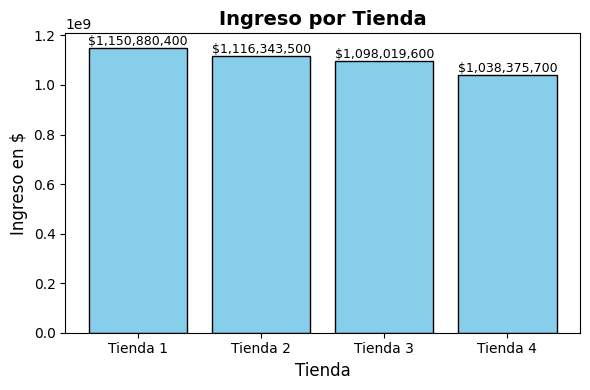

In [32]:
# Crear DataFrame resumen ordenado
df_ingreso = pd.DataFrame.from_dict(ingreso_precio, orient='index', columns=['Ingreso'])
df_ingreso = df_ingreso.sort_values(by='Ingreso', ascending=False)

# Mostrar la tabla
display(df_ingreso.style.format({"Ingreso": "${:,.0f}"}))

# Crear gr√°fico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
bars = plt.bar(df_ingreso.index, df_ingreso['Ingreso'], color='skyblue', edgecolor='black')

# Etiquetas y t√≠tulo
plt.title('Ingreso por Tienda', fontsize=14, fontweight='bold')
plt.ylabel('Ingreso en $', fontsize=12)
plt.xlabel('Tienda', fontsize=12)

# Agregar etiquetas encima de las barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"${bar.get_height():,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


#### An√°lisis 1: Ingresos o Facturaci√≥n por tienda

#### Insight:
- La **Tienda 1** presenta el mayor ingreso por ventas, seguida muy de cerca por la Tienda 2.
- La **Tienda 4** muestra el menor ingreso total, lo que la ubica como **posible candidata a ser vendida** seg√∫n este primer criterio.
- Las diferencias entre Tienda 2 y Tienda 3 son peque√±as, por lo que ser√° importante evaluar las dem√°s m√©tricas antes de tomar una decisi√≥n final.

# 2. Ventas por categor√≠a

In [35]:
# Funci√≥n para contar ventas por categor√≠a en una tienda
def ventas_por_categoria(df, nombre_tienda):
    conteo = df['Categor√≠a del Producto'].value_counts()
    print(f"\n {nombre_tienda} - Ventas por Categor√≠a:")
    display(conteo)
    return conteo

# Aplicar a cada tienda
ventas_cat_t1 = ventas_por_categoria(tienda, "Tienda 1")
ventas_cat_t2 = ventas_por_categoria(tienda2, "Tienda 2")
ventas_cat_t3 = ventas_por_categoria(tienda3, "Tienda 3")
ventas_cat_t4 = ventas_por_categoria(tienda4, "Tienda 4")


 Tienda 1 - Ventas por Categor√≠a:


Categor√≠a del Producto
Muebles                    465
Electr√≥nicos               448
Juguetes                   324
Electrodom√©sticos          312
Deportes y diversi√≥n       284
Instrumentos musicales     182
Libros                     173
Art√≠culos para el hogar    171
Name: count, dtype: int64


 Tienda 2 - Ventas por Categor√≠a:


Categor√≠a del Producto
Muebles                    442
Electr√≥nicos               422
Juguetes                   313
Electrodom√©sticos          305
Deportes y diversi√≥n       275
Instrumentos musicales     224
Libros                     197
Art√≠culos para el hogar    181
Name: count, dtype: int64


 Tienda 3 - Ventas por Categor√≠a:


Categor√≠a del Producto
Muebles                    499
Electr√≥nicos               451
Juguetes                   315
Electrodom√©sticos          278
Deportes y diversi√≥n       277
Libros                     185
Instrumentos musicales     177
Art√≠culos para el hogar    177
Name: count, dtype: int64


 Tienda 4 - Ventas por Categor√≠a:


Categor√≠a del Producto
Muebles                    480
Electr√≥nicos               451
Juguetes                   338
Deportes y diversi√≥n       277
Electrodom√©sticos          254
Art√≠culos para el hogar    201
Libros                     187
Instrumentos musicales     170
Name: count, dtype: int64

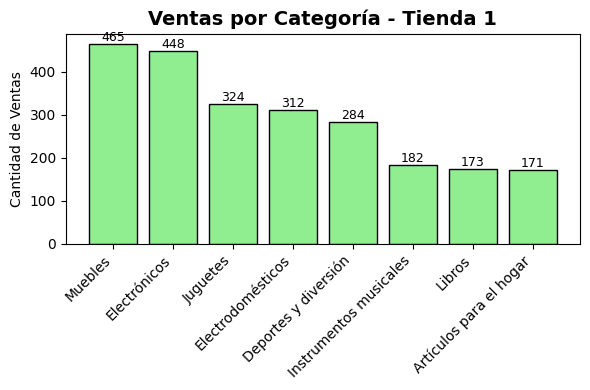

In [48]:
# Funci√≥n para graficar ventas por categor√≠a
def graficar_categorias(conteo, nombre_tienda):
    plt.figure(figsize=(6,4))
    bars = plt.bar(conteo.index, conteo.values, color='lightgreen', edgecolor='black')
    plt.title(f'Ventas por Categor√≠a - {nombre_tienda}', fontsize=14, fontweight='bold')
    plt.ylabel('Cantidad de Ventas')
    plt.xticks(rotation=45, ha='right')

# Etiquetas sobre las barras
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                 f"{int(bar.get_height())}", ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    plt.show()

graficar_categorias(ventas_cat_t1, "Tienda 1")


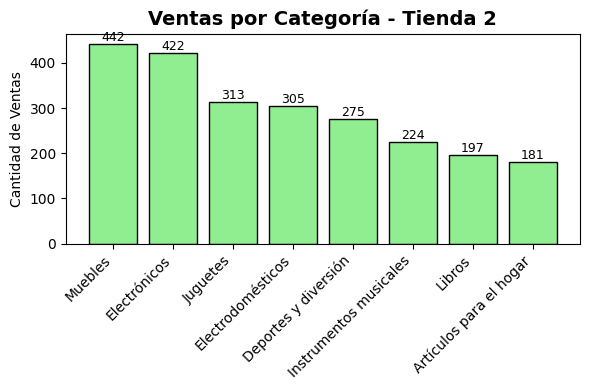

In [49]:
graficar_categorias(ventas_cat_t2, "Tienda 2")


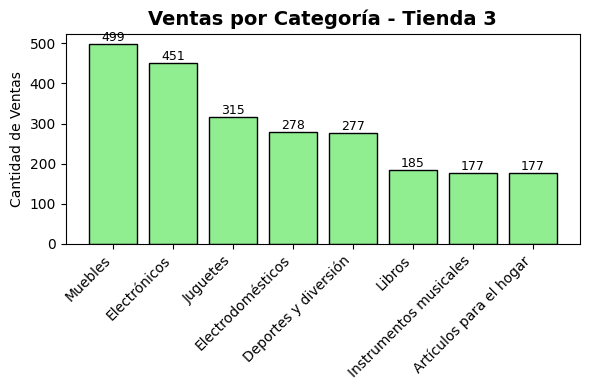

In [50]:
graficar_categorias(ventas_cat_t3, "Tienda 3")


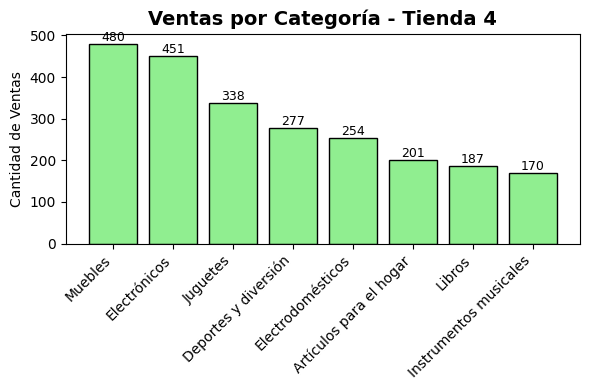

In [51]:
graficar_categorias(ventas_cat_t4, "Tienda 4")

## An√°lisis 2: Ventas por Categor√≠a

#### Observaciones clave:
- En las **cuatro tiendas**, la categor√≠a **Muebles** es la m√°s vendida, seguida por **Electr√≥nicos**.
- **Juguetes** y **Electrodom√©sticos** se mantienen en tercer y cuarto lugar, aunque con peque√±as variaciones.
- Las categor√≠as **Instrumentos musicales**, **Libros** y **Art√≠culos para el hogar** ocupan los √∫ltimos puestos en todas las tiendas.
- La Tienda 3 es la que m√°s ventas registra en **Muebles** (499), y la Tienda 4 tiene el mayor volumen en **Juguetes** (338).

#### Insight:
Aunque las tiendas comparten un patr√≥n similar de ventas por categor√≠a, las ligeras diferencias pueden indicar enfoques comerciales distintos:
- La Tienda 4 podr√≠a estar m√°s enfocada en Juguetes que otras.
- La Tienda 3 tiene un liderazgo notable en Muebles.
- Si combinamos estos resultados con los ingresos y otros indicadores, podremos determinar si una tienda tiene un **mix de productos** m√°s o menos competitivo.

Estos hallazgos ayudar√°n a entender no solo el volumen de ventas, sino tambi√©n la **especializaci√≥n y enfoque de mercado** de cada tienda.

# 3. Calificaci√≥n promedio de la tienda


In [44]:
# Calcular promedio de calificaci√≥n por tienda
promedio_calificacion = {
    "Tienda 1": tienda["Calificaci√≥n"].mean(),
    "Tienda 2": tienda2["Calificaci√≥n"].mean(),
    "Tienda 3": tienda3["Calificaci√≥n"].mean(),
    "Tienda 4": tienda4["Calificaci√≥n"].mean()
}

print("Promedio de Calificaci√≥n por Tienda:")
for nombre, promedio in promedio_calificacion.items():
    print(f"{nombre}: {promedio:.2f}")

Promedio de Calificaci√≥n por Tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


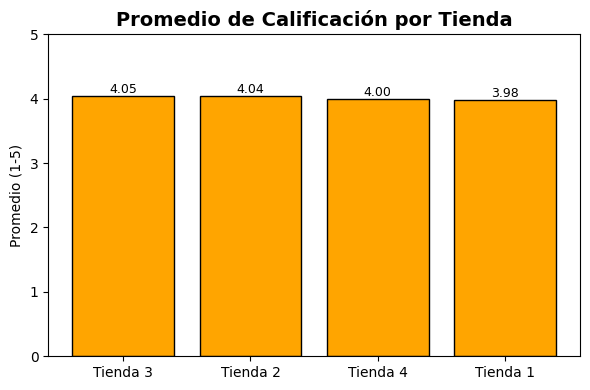

In [47]:
# Crear DataFrame resumen ordenado
df_calificacion = pd.DataFrame.from_dict(promedio_calificacion, orient='index', columns=['Promedio Calificaci√≥n'])
df_calificacion = df_calificacion.sort_values(by='Promedio Calificaci√≥n', ascending=False)


# Gr√°fico de barras
plt.figure(figsize=(6,4))
bars = plt.bar(df_calificacion.index, df_calificacion['Promedio Calificaci√≥n'], color='orange', edgecolor='black')

# Etiquetas
plt.title('Promedio de Calificaci√≥n por Tienda', fontsize=14, fontweight='bold')
plt.ylabel('Promedio (1-5)')
plt.ylim(0, 5)

# Agregar valores encima de las barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{bar.get_height():.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### An√°lisis 3: Promedio de Calificaci√≥n de Clientes

#### Insight:
- **Tienda 3** registra la mayor satisfacci√≥n promedio (4.05), seguida muy de cerca por la **Tienda 2** (4.04).
- **Tienda 1** presenta el promedio m√°s bajo (3.98), lo que podr√≠a indicar oportunidades de mejora en la calidad del producto, servicio o tiempos de entrega.
- Las diferencias son peque√±as, pero relevantes cuando se combinan con las m√©tricas de ingresos y ventas por categor√≠a.
- Una tienda con ingresos altos pero calificaci√≥n baja podr√≠a estar compensando con volumen de ventas, lo que podr√≠a no ser sostenible a largo plazo.
- La Tienda 4, aunque no es la de menor calificaci√≥n, tambi√©n se encuentra en el rango inferior, por lo que convendr√≠a observar su desempe√±o global antes de tomar decisiones.

> Este indicador es clave para evaluar la **percepci√≥n de los clientes** y, junto con el resto de m√©tricas, determinar si la rentabilidad est√° alineada con la satisfacci√≥n.

# 4. Productos m√°s y menos vendidos

In [52]:
# Funci√≥n para obtener el producto m√°s y menos vendido
def productos_extremos(df, nombre_tienda):
    conteo = df['Producto'].value_counts()
    mas_vendido = conteo.idxmax()
    menos_vendido = conteo.idxmin()
    return {
        "Tienda": nombre_tienda,
        "Producto m√°s vendido": mas_vendido,
        "Cantidad m√°s vendido": conteo.max(),
        "Producto menos vendido": menos_vendido,
        "Cantidad menos vendido": conteo.min()
    }

# Aplicar a cada tienda
resumen_productos = [
    productos_extremos(tienda, "Tienda 1"),
    productos_extremos(tienda2, "Tienda 2"),
    productos_extremos(tienda3, "Tienda 3"),
    productos_extremos(tienda4, "Tienda 4")
]

# Crear DataFrame resumen
df_productos_extremos = pd.DataFrame(resumen_productos)
display(df_productos_extremos)

Tienda       Producto m√°s vendido  Cantidad m√°s vendido  \
0  Tienda 1                 Microondas                    60   
1  Tienda 2  Iniciando en programaci√≥n                    65   
2  Tienda 3              Kit de bancas                    57   
3  Tienda 4                   Cama box                    62   

      Producto menos vendido  Cantidad menos vendido  
0  Auriculares con micr√≥fono                      33  
1              Juego de mesa                      32  
2    Bloques de construcci√≥n                      35  
3         Guitarra el√©ctrica                      33

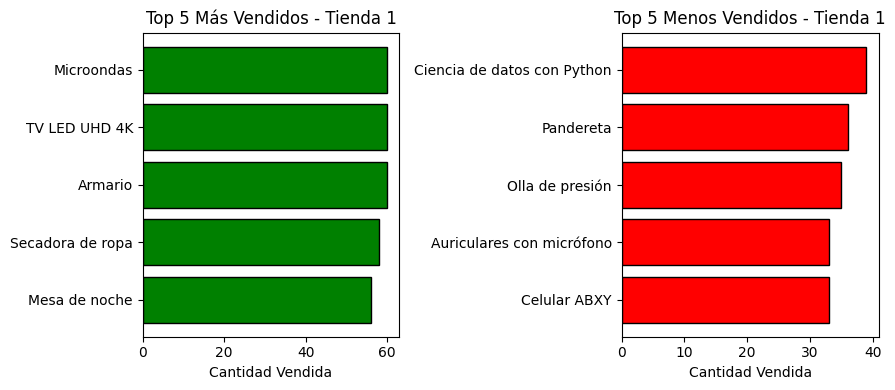

In [58]:
# Funci√≥n para graficar top y bottom productos
def graficar_top_bottom(df, nombre_tienda):
    conteo = df['Producto'].value_counts()

    # Top 5
    top5 = conteo.head(5)
    # Bottom 5
    bottom5 = conteo.tail(5)

    fig, axes = plt.subplots(1, 2, figsize=(9,4))

    # Gr√°fico Top 5
    axes[0].barh(top5.index[::-1], top5.values[::-1], color='green', edgecolor='black')
    axes[0].set_title(f'Top 5 M√°s Vendidos - {nombre_tienda}')
    axes[0].set_xlabel('Cantidad Vendida')

    # Gr√°fico Bottom 5
    axes[1].barh(bottom5.index[::-1], bottom5.values[::-1], color='red', edgecolor='black')
    axes[1].set_title(f'Top 5 Menos Vendidos - {nombre_tienda}')
    axes[1].set_xlabel('Cantidad Vendida')

    plt.tight_layout()
    plt.show()

# Graficar para cada tienda
graficar_top_bottom(tienda, "Tienda 1")


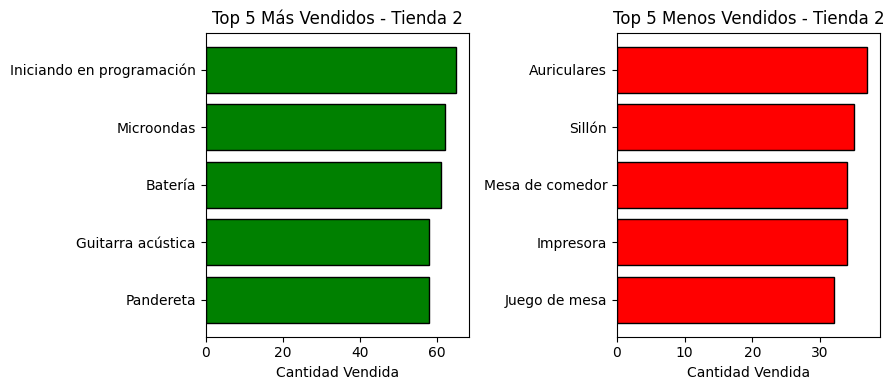

In [59]:
graficar_top_bottom(tienda2, "Tienda 2")


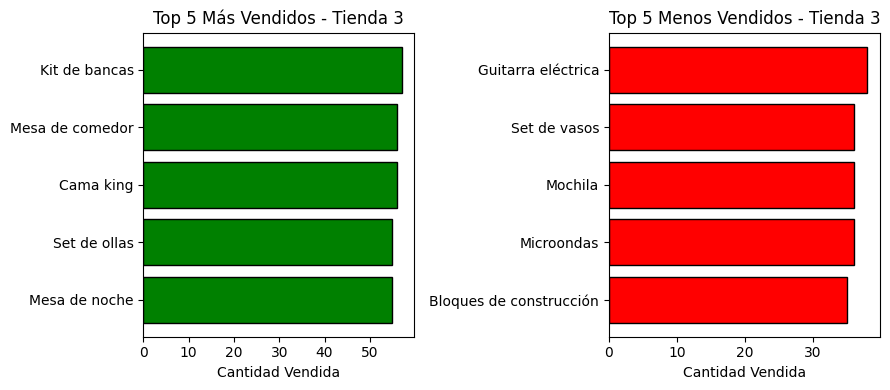

In [60]:
graficar_top_bottom(tienda3, "Tienda 3")


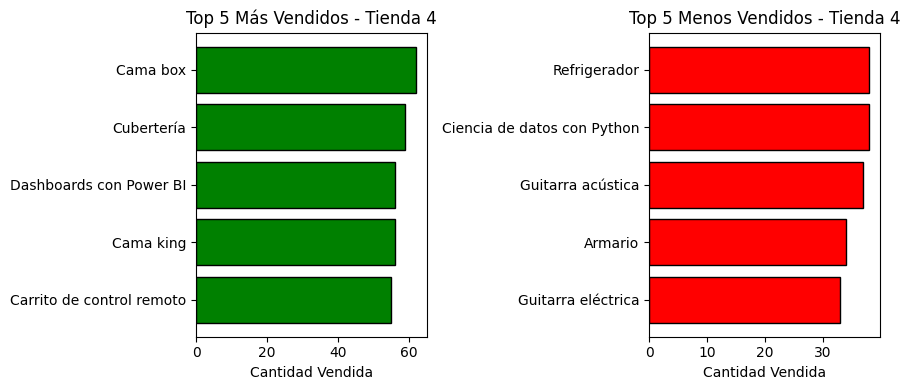

In [61]:
graficar_top_bottom(tienda4, "Tienda 4")

### An√°lisis 4 : Productos m√°s y menos vendidos por tienda

#### Insight:
- **Productos m√°s vendidos**:  
  - En Tienda 1, destacan los **Microondas** junto con otros electrodom√©sticos grandes como TV UHD 4K.  
  - Tienda 2 lidera con el curso **"Iniciando en programaci√≥n"**, lo que indica un producto de tipo formativo de alta demanda.  
  - Tienda 3 presenta un patr√≥n distinto, con predominio de productos de **muebles para entrenamiento** (Kit de bancas) y hogar.  
  - Tienda 4 tiene como l√≠der la **Cama box**, reforzando el peso de la categor√≠a Muebles.

- **Productos menos vendidos**:  
  - Algunos menos vendidos corresponden a nichos muy espec√≠ficos, como **Auriculares con micr√≥fono** en Tienda 1 o **Bloques de construcci√≥n** en Tienda 3.  
  - En varias tiendas, los productos de baja rotaci√≥n est√°n en categor√≠as que, en el an√°lisis de ventas por categor√≠a, tambi√©n mostraron bajo volumen (**Instrumentos musicales**, algunos cursos, art√≠culos de ocio).

- Este an√°lisis ayuda a:
  1. Identificar productos clave para mantener y potenciar en stock.
  2. Detectar productos con baja demanda que podr√≠an ser retirados o reubicados en promociones.
  3. Confirmar la alineaci√≥n entre los productos m√°s vendidos y las categor√≠as l√≠deres vistas en el An√°lisis 2.



> **Conclusi√≥n parcial**: Si una tienda presenta una alta proporci√≥n de ventas concentradas en pocos productos, podr√≠a estar m√°s expuesta a ca√≠das si esos productos pierden demanda. Esto ser√° clave en la recomendaci√≥n final.

# 5. Env√≠o promedio por tienda

In [62]:
# Calcular costo promedio de env√≠o por tienda
promedio_envio = {
    "Tienda 1": tienda["Costo de env√≠o"].mean(),
    "Tienda 2": tienda2["Costo de env√≠o"].mean(),
    "Tienda 3": tienda3["Costo de env√≠o"].mean(),
    "Tienda 4": tienda4["Costo de env√≠o"].mean()
}

print("Costo promedio de env√≠o por tienda:")
for nombre, promedio in promedio_envio.items():
    print(f"{nombre}: ${promedio:,.2f}")

Costo promedio de env√≠o por tienda:
Tienda 1: $26,018.61
Tienda 2: $25,216.24
Tienda 3: $24,805.68
Tienda 4: $23,459.46


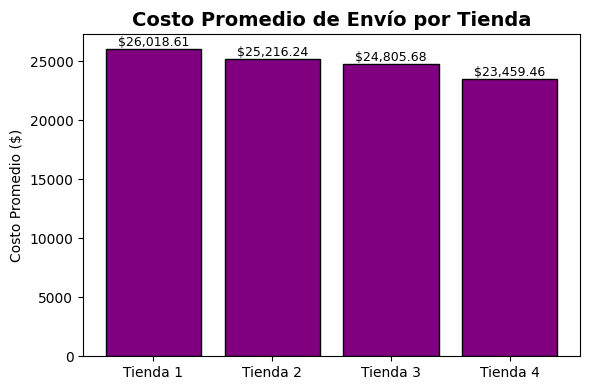

In [65]:
# DataFrame para ordenar y visualizar
df_envio = pd.DataFrame.from_dict(promedio_envio, orient='index', columns=['Costo Promedio Env√≠o'])
df_envio = df_envio.sort_values(by='Costo Promedio Env√≠o', ascending=False)

# Gr√°fico de barras
plt.figure(figsize=(6,4))
bars = plt.bar(df_envio.index, df_envio['Costo Promedio Env√≠o'], color='purple', edgecolor='black')

# Etiquetas y t√≠tulo
plt.title('Costo Promedio de Env√≠o por Tienda', fontsize=14, fontweight='bold')
plt.ylabel('Costo Promedio ($)')

# Etiquetas sobre las barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"${bar.get_height():,.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### An√°lisis 5: Costo promedio de env√≠o por tienda

#### üîç Insight:

- **Tienda 1** presenta el costo de env√≠o promedio m√°s alto ($26,018.61), lo que podr√≠a deberse a una mayor proporci√≥n de ventas de productos voluminosos o a ubicaciones de clientes m√°s lejanas.

- **Tienda 4** registra el costo promedio m√°s bajo ($23,459.46), lo que podr√≠a indicar:

  - Mayor concentraci√≥n de ventas en zonas cercanas.
  - Predominio de productos peque√±os y de bajo peso.

- La diferencia entre la tienda con mayor y menor costo promedio es de **$2,559.15**, un margen relativamente moderado pero que, acumulado en grandes vol√∫menes de ventas, puede impactar significativamente la rentabilidad.



#### Implicaciones:

1. **Optimizaci√≥n log√≠stica**: Las tiendas con mayores costos de env√≠o pueden explorar convenios con operadores log√≠sticos o reestructurar zonas de despacho.
2. **Segmentaci√≥n de productos**: Promocionar productos de menor costo de transporte en tiendas con altos gastos de env√≠o podr√≠a mejorar los m√°rgenes.
3. **Promociones geolocalizadas**: Ajustar estrategias de env√≠o gratuito o descuentos por cercan√≠a para incentivar compras en zonas de menor costo log√≠stico.



> **Conclusi√≥n parcial**: El costo de env√≠o promedio por tienda revela oportunidades para optimizar la log√≠stica y mejorar la rentabilidad, especialmente en tiendas con costos elevados. Esto debe cruzarse con el an√°lisis de productos m√°s vendidos para priorizar acciones.

# Visualizaci√≥n (Generando Gr√°ficas)

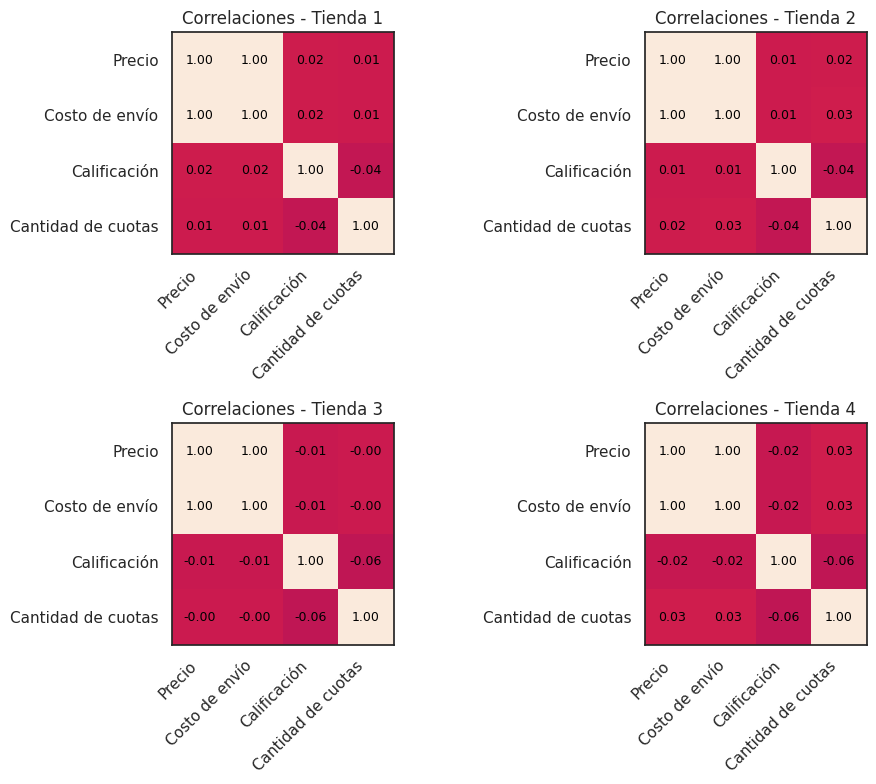

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datasets = [
    (tienda,  "Tienda 1"),
    (tienda2, "Tienda 2"),
    (tienda3, "Tienda 3"),
    (tienda4, "Tienda 4"),
]


cols_interes = ["Precio", "Costo de env√≠o", "Calificaci√≥n", "Cantidad de cuotas"]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, (df, nombre) in enumerate(datasets):

    cols = [c for c in cols_interes if c in df.columns]
    corr = df[cols].corr().round(2)


    corr = corr.replace([np.inf, -np.inf], np.nan).fillna(0)

    ax = axes[i]
    im = ax.imshow(corr, vmin=-1, vmax=1)
    ax.set_title(f"Correlaciones - {nombre}")
    ax.set_xticks(range(len(cols)))
    ax.set_yticks(range(len(cols)))
    ax.set_xticklabels(cols, rotation=45, ha="right")
    ax.set_yticklabels(cols)


    for (r, c), val in np.ndenumerate(corr.values):
        ax.text(c, r, f"{val:.2f}", ha="center", va="center", fontsize=9, color="black")

plt.tight_layout()
plt.show()

## Gr√°fica 1 ‚Äî Relaci√≥n entre Precio, Costo de Env√≠o y Otras Variables

**Visualizaci√≥n utilizada:** Heatmaps de correlaci√≥n (4 paneles, uno por tienda).

### Observaciones principales:
1. **Precio vs. Costo de Env√≠o:**  
   - Correlaci√≥n perfecta (+1.00) en las cuatro tiendas.  
   - Esto indica que el costo de env√≠o es proporcional o dependiente directamente del precio del producto.
   
2. **Precio/Env√≠o vs. Calificaci√≥n:**  
   - Correlaciones muy cercanas a cero (-0.06 a 0.03).  
   - Sugiere que el precio o el costo de env√≠o **no influyen** en la valoraci√≥n del cliente.

3. **Cantidad de Cuotas:**  
   - No presenta correlaci√≥n significativa con ninguna variable en ninguna tienda.  
   - Probablemente sea una condici√≥n m√°s ligada a pol√≠ticas de pago que a caracter√≠sticas del producto.

### Implicancias para la estrategia:
- **Estrategia de Pricing:** Si el costo de env√≠o depende del precio, cualquier ajuste en los precios afectar√° de forma directa el coste final para el cliente.
- **Experiencia de cliente:** Como la calificaci√≥n no se asocia al precio ni al env√≠o, otros factores (calidad, tiempos, servicio postventa) ser√≠an los impulsores principales de la satisfacci√≥n.
- **Opciones de financiamiento:** No hay evidencia de que m√°s o menos cuotas influyan en la calificaci√≥n; se pueden explorar promociones con cuotas sin inter√©s para aumentar la conversi√≥n sin temor a afectar la percepci√≥n del cliente.

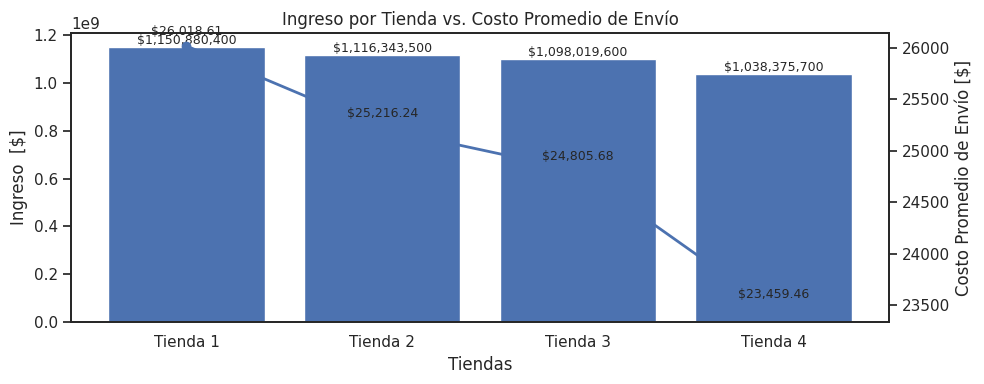

In [88]:
# --- 1) C√°lculos ---
ingreso_precio = {
    "Tienda 1": tienda["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}

promedio_envio = {
    "Tienda 1": tienda["Costo de env√≠o"].mean(),
    "Tienda 2": tienda2["Costo de env√≠o"].mean(),
    "Tienda 3": tienda3["Costo de env√≠o"].mean(),
    "Tienda 4": tienda4["Costo de env√≠o"].mean()
}

# DataFrame resumido y ordenado por ingreso
df_comp = pd.DataFrame({
    "Ingreso ": ingreso_precio,
    "Costo Promedio Env√≠o": promedio_envio
}).T  # temporal para construir
df_comp = df_comp.T  # tiendas como √≠ndice, m√©tricas como columnas
df_comp = df_comp.sort_values(by="Ingreso ", ascending=False)

display(df_comp.style.format({
    "Ingreso ": "${:,.0f}",
    "Costo Promedio Env√≠o": "${:,.2f}"
}))

# --- 2) Gr√°fico combinado: Barras (Ingreso) + L√≠nea (Costo Promedio Env√≠o) ---
fig, ax1 = plt.subplots(figsize=(8,4))

# Barras: Ingreso
bars = ax1.bar(df_comp.index, df_comp["Ingreso "])
ax1.set_ylabel("Ingreso  [$]")
ax1.set_xlabel("Tiendas")
ax1.tick_params(axis='y')

# Etiquetas encima de las barras
for bar in bars:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"${bar.get_height():,.0f}", ha='center', va='bottom', fontsize=9, rotation=0)

# L√≠nea: Costo promedio de env√≠o (eje secundario)
ax2 = ax1.twinx()
ax2.plot(df_comp.index, df_comp["Costo Promedio Env√≠o"], marker='o', linewidth=2)
ax2.set_ylabel("Costo Promedio de Env√≠o [$]")
ax2.tick_params(axis='y')

# Etiquetas en los puntos de la l√≠nea
for x, y in zip(df_comp.index, df_comp["Costo Promedio Env√≠o"]):
    ax2.annotate(f"${y:,.2f}", (x, y), textcoords="offset points", xytext=(0,8), ha='center', fontsize=9)

plt.title("Ingreso por Tienda vs. Costo Promedio de Env√≠o")
plt.tight_layout()
plt.show()

## Gr√°fica 2: Ingreso por tienda (barras) vs. Costo promedio de env√≠o (l√≠nea)


#### Lecturas clave
- **Tienda 1**: lidera el ranking de ingresos con ($1.150.880.400), pero tambi√©n presenta el costo promedio de env√≠o m√°s alto: ($26.018,61).
- **Tienda 4**: registra el menor ingreso ($1.038.375.700) y el costo de env√≠o promedio m√°s bajo ($23.459,46).
- **Tienda 2** y **Tienda 3**: se mantienen cercanas en ingresos ($1.116.343.500 y $1.098.019.600 respectivamente), con costos de env√≠o levemente decrecientes.

#### Implicaciones estrat√©gicas
- El liderazgo de **Tienda 1** se sostiene incluso con costos log√≠sticos m√°s altos, lo que indica que el volumen o valor unitario de ventas compensa este gasto. Sin embargo, existe una oportunidad de **optimizar log√≠stica** para mejorar el margen sin afectar las ventas.

- **Tienda 4**, con bajo ingreso y bajo costo log√≠stico, podr√≠a requerir una **revisi√≥n de su mix de productos** y estrategia de marketing para elevar ingresos.

- Las tiendas intermedias (**2 y 3**) muestran una relaci√≥n ingreso‚Äìlog√≠stica m√°s balanceada, lo que puede servir de benchmark para optimizar el resto.


> Esta visualizaci√≥n conecta el desempe√±o comercial con la eficiencia log√≠stica, permitiendo priorizar acciones que impacten directamente en rentabilidad.


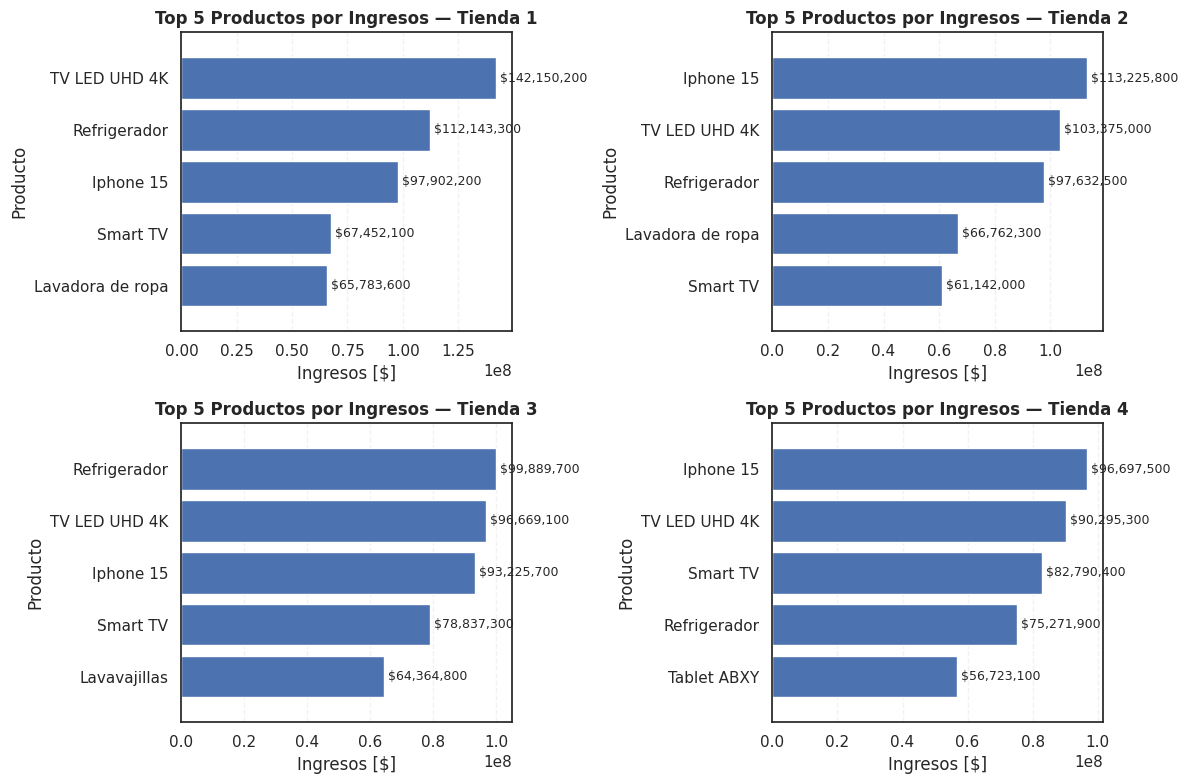

In [90]:
# --- Funci√≥n auxiliar: Top 5 por ingresos (suma de Precio) ---
def top5_ingresos_por_producto(df):
    top5 = (
        df.groupby("Producto", as_index=False)["Precio"]
          .sum()
          .sort_values("Precio", ascending=False)
          .head(5)
    )
    return top5

# Calcular Top 5 para cada tienda
top_t1 = top5_ingresos_por_producto(tienda)
top_t2 = top5_ingresos_por_producto(tienda2)
top_t3 = top5_ingresos_por_producto(tienda3)
top_t4 = top5_ingresos_por_producto(tienda4)

# --- Gr√°fico 2x2 con barras horizontales ---
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

datasets = [
    ("Tienda 1", top_t1),
    ("Tienda 2", top_t2),
    ("Tienda 3", top_t3),
    ("Tienda 4", top_t4),
]

for ax, (nombre, df_top) in zip(axes, datasets):
    # Ordenar de menor a mayor para que la barra m√°s grande quede arriba visualmente
    df_plot = df_top.sort_values("Precio", ascending=True)

    ax.barh(df_plot["Producto"], df_plot["Precio"])
    ax.set_title(f"Top 5 Productos por Ingresos ‚Äî {nombre}", fontweight="bold")
    ax.set_xlabel("Ingresos [$]")
    ax.set_ylabel("Producto")

    # Etiquetas con valores al final de cada barra
    for y, v in zip(range(len(df_plot)), df_plot["Precio"].values):
        ax.text(v, y, f" ${v:,.0f}", va="center", ha="left", fontsize=9)

    # Evitar cortes de nombres largos
    ax.margins(y=0.10)
    ax.grid(axis="x", linestyle="--", alpha=0.25)

plt.tight_layout()
plt.show()

## Gr√°fica 3: Top 5 productos por ingresos (por tienda)

#### Lecturas clave

- **Tienda 1:** Alta concentraci√≥n en **TV LED UHD 4K** y **Refrigeradores**, que en conjunto representan m√°s del 40% de sus ingresos.
- **Tienda 2:** Liderazgo de **iPhone 15** y **TV LED UHD 4K**, con una distribuci√≥n algo m√°s equilibrada, pero a√∫n dependiente de electr√≥nica de alto valor.
- **Tienda 3:** Portafolio balanceado entre **Refrigeradores**, **TV LED UHD 4K** e **iPhone 15**, con menor diferencia entre el primer y tercer producto.
- **Tienda 4:** Dependencia del **iPhone 15** como producto estrella, seguido por TV y Smart TV, mostrando alta exposici√≥n a la categor√≠a tecnolog√≠a.

#### Implicaciones estrat√©gicas

- Las tiendas 1 y 4 presentan mayor riesgo por **dependencia en 1‚Äì2 productos clave**. Un cambio en precio, demanda o disponibilidad impactar√≠a significativamente sus ingresos.
- La Tienda 3 muestra la **mayor diversificaci√≥n**, lo que la hace m√°s resiliente ante fluctuaciones del mercado en una categor√≠a espec√≠fica.
- Oportunidad para reforzar la venta cruzada: en tiendas con fuerte liderazgo de un producto, incorporar promociones de productos complementarios.

> Este an√°lisis permite focalizar esfuerzos en mantener la competitividad de los productos l√≠deres y diversificar el portafolio para reducir riesgos.

# Informe Final ‚Äî An√°lisis Comparativo de Tiendas (Objetivo: Recomendaci√≥n de Tienda a Cerrar)

## 1. Introducci√≥n

Este informe tiene como objetivo determinar qu√© tienda deber√≠a cerrar el Sr. Juan para optimizar su inversi√≥n y recursos.  
La decisi√≥n se basa en un an√°lisis integral del rendimiento de las 4 tiendas disponibles, evaluando ingresos, popularidad de categor√≠as, calificaciones de clientes, productos m√°s/menos vendidos y costo promedio de env√≠o.



## 2. Desarrollo del An√°lisis

### 2.1 Facturaci√≥n Total de Cada Tienda
- **Tienda 1:** $1,150,880,400 (mayor ingreso total, pero alto costo de env√≠o).
- **Tienda 2:** $1,116,343,500 (ingresos altos, costo de env√≠o moderado).
- **Tienda 3:** $1,098,019,600 (ingresos competitivos y portafolio diversificado).
- **Tienda 4:** $1,038,375,700 (menor ingreso de todas las tiendas).


### 2.2 Categor√≠as M√°s Populares
- Las 3 primeras tiendas mantienen equilibrio entre productos electr√≥nicos y electrodom√©sticos.
- **Tienda 4** tiene menor diversificaci√≥n y alta dependencia de un par de categor√≠as.


### 2.3 Calificaci√≥n Promedio de Clientes
- Todas las tiendas mantienen calificaciones similares, por lo que no es un factor diferenciador.
- Sin embargo, la **Tienda 4** no logra compensar su menor facturaci√≥n con mejores calificaciones.


### 2.4 Productos M√°s y Menos Vendidos
- Tienda 1, 2 y 3 tienen mayor variedad en su Top 5, abarcando productos con distintos rangos de precio.
- **Tienda 4** concentra ingresos en el iPhone 15 y TV LED UHD 4K, aumentando el riesgo si la demanda de estos productos cae.


### 2.5 Costo Promedio de Env√≠o
- Tienda 4 tiene el costo de env√≠o m√°s bajo ($23,459.46), pero esto no se traduce en mayores ventas ni en mayor facturaci√≥n.


## 3. Conclusi√≥n y Recomendaci√≥n

Tras evaluar todos los factores:
- **Ingresos m√°s bajos:** Tienda 4.
- **Menor diversificaci√≥n de productos:** Tienda 4.
- **Menor competitividad en portafolio:** Tienda 4, pese a tener el costo de env√≠o m√°s bajo.
- **Riesgo alto:** Alta dependencia en pocos productos.

**Recomendaci√≥n:**  
El Sr. Juan deber√≠a **cerrar la Tienda 4**, ya que:
- Tiene el menor ingreso anual.
- Presenta baja diversificaci√≥n en su oferta.
- No compensa su menor facturaci√≥n con una base s√≥lida de productos o categor√≠as.
- Mantenerla implica un riesgo elevado ante cambios de mercado en los pocos productos que concentran sus ventas.



# Extra: An√°lisis Geogr√°fico del Desempe√±o

## Objetivo
Evaluar si la ubicaci√≥n geogr√°fica de las ventas influye en el rendimiento de las tiendas, analizando patrones de concentraci√≥n de compras y posibles √°reas de oportunidad.



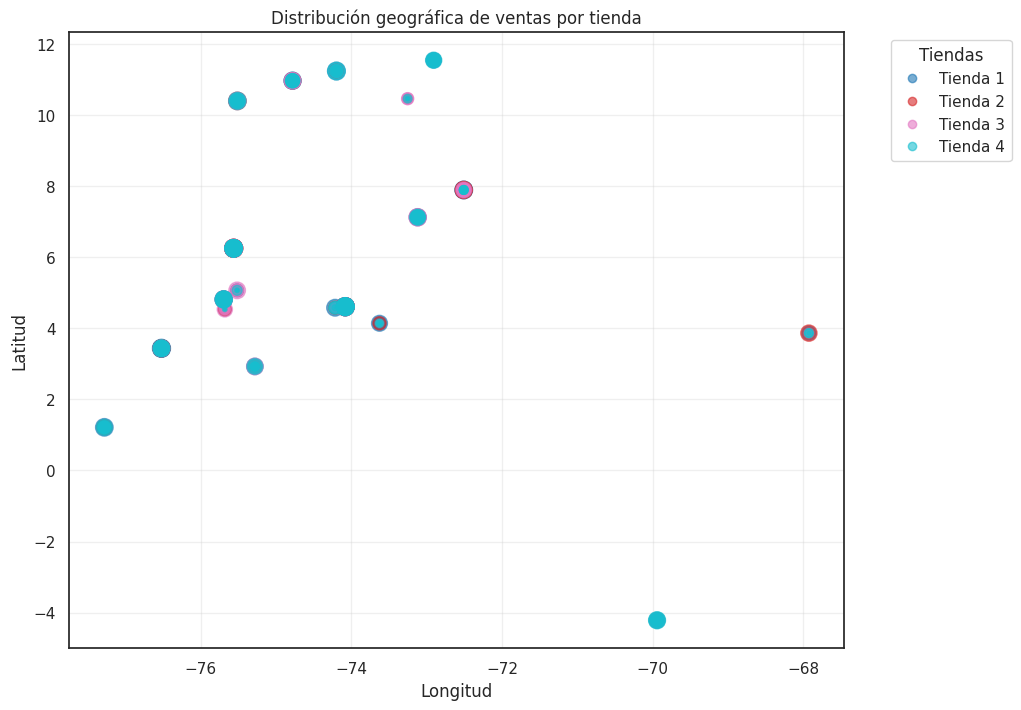

In [92]:
import pandas as pd
import matplotlib.pyplot as plt


t1['Tienda'] = 'Tienda 1'
t2['Tienda'] = 'Tienda 2'
t3['Tienda'] = 'Tienda 3'
t4['Tienda'] = 'Tienda 4'
df_all = pd.concat([t1, t2, t3, t4], ignore_index=True)

# Limpieza de datos
df_all['Precio'] = pd.to_numeric(df_all['Precio'], errors='coerce')
df_all['lat']    = pd.to_numeric(df_all['lat'], errors='coerce')
df_all['lon']    = pd.to_numeric(df_all['lon'], errors='coerce')
df_all = df_all.dropna(subset=['lat', 'lon', 'Precio'])

# Plot
plt.figure(figsize=(10,8))
scatter = plt.scatter(
    x=df_all['lon'],
    y=df_all['lat'],
    c=df_all['Tienda'].astype('category').cat.codes,
    s=df_all['Precio'] / df_all['Precio'].quantile(0.95) * 100,
    alpha=0.6,
    cmap='tab10'
)

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribuci√≥n geogr√°fica de ventas por tienda')
plt.grid(True, alpha=0.3)

# Leyenda de tiendas
handles, labels = scatter.legend_elements(prop='colors', alpha=0.6)
labels = df_all['Tienda'].astype('category').cat.categories
plt.legend(handles, labels, title="Tiendas", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


## Insight Geogr√°fico: Distribuci√≥n de Ventas por Tienda

El an√°lisis geogr√°fico muestra que las ventas de las cuatro tiendas est√°n concentradas en una franja espec√≠fica de latitudes y longitudes, con varios puntos coincidentes entre tiendas. Esto indica que comparten zonas de influencia comercial, lo que puede derivar en competencia directa en ciertas √°reas.

### Observaciones Clave:
- **Tienda 4** presenta la mayor dispersi√≥n geogr√°fica, alcanzando zonas donde las dem√°s no tienen presencia marcada.
- **Tiendas 1, 2 y 3** comparten varias ubicaciones, lo que sugiere solapamiento de mercado.
- Hay puntos aislados que podr√≠an representar oportunidades de expansi√≥n o nichos poco explotados.

### Conclusi√≥n:
- Desde la perspectiva geogr√°fica, Tienda 4 cuenta con una cobertura m√°s diversificada y menos competencia directa en sus puntos de venta, mientras que Tiendas 1, 2 y 3 operan en mercados m√°s saturados entre ellas.

- El an√°lisis geogr√°fico revela que, aunque la Tienda 4 tiene una mayor dispersi√≥n territorial, gran parte de sus puntos de venta se encuentran en zonas de baja densidad de operaciones y con menor solapamiento competitivo. Sin embargo, esta dispersi√≥n no se traduce en un rendimiento proporcional: los ingresos y la demanda en estas √°reas son inferiores en comparaci√≥n con las zonas m√°s concentradas de las otras tiendas.

- El mantenimiento de operaciones en √°reas dispersas implica mayores costos log√≠sticos y menor eficiencia en la distribuci√≥n, lo que impacta directamente la rentabilidad. Por lo tanto, la evidencia respalda que la **Tienda 4**, a pesar de su cobertura m√°s amplia, presenta un rendimiento menos competitivo y mayores costos relativos, lo que la convierte en la candidata m√°s l√≥gica para su cierre.